In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

In [2]:
activity = pd.read_csv('activity.csv')
activity.head()

,date,customer,activity_type,activity_count
0,2021-01-20,0032j000002jRYxAAM,a,1
1,2021-05-11,0032j00000FZcIvAAL,a,1
2,2020-12-09,0032j000002gKM8AAM,a,1
3,2021-03-30,0032j000001UX7cAAG,a,1
4,2020-10-19,0032j000004etUWAAY,a,1


**Lets find out how many times each activites were done individually with customers**

In [3]:
distinct_activity_count = activity.groupby('activity_type').sum()
distinct_activity_count = distinct_activity_count.sort_values(by = 'activity_count',ascending = False)
distinct_activity_count

,activity_count
activity_type,
m,141826
l,105307
x,87210
u,72070
j,67173
n,66369
a,54025
h,51355
i,38058


From 9-1-2020 the above number of times each activites is done with customers

**Now lets find out average time of closing a deal with customers**

In [4]:
target = pd.read_csv('target.csv')
target.head()

,customer,date
0,0032j000001UaIdAAK,2020-11-06
1,0032j000002hwpFAAQ,2021-05-20
2,0032j0000077nwFAAQ,2020-12-18
3,0032j000001UU6aAAG,2020-11-20
4,0032j000001UFAIAA4,2021-02-18


In [5]:
#merging activity and target csv files
target_activity=pd.merge(target,activity,on = 'customer',how = 'inner')
target_activity.dtypes

customer          object
date_x            object
date_y            object
activity_type     object
activity_count     int64
dtype: object

In [6]:
#renaming date_x and date_y column
target_activity = target_activity.rename(columns={'date_x':'activity_start','date_y':'activity_end'})

In [7]:
sequence = ['customer','activity_start','activity_end','activity_type','activity_count']
target_activity = target_activity.reindex(columns=sequence)
target_activity.head()

,customer,activity_start,activity_end,activity_type,activity_count
0,0032j000001UaIdAAK,2020-11-06,2020-09-04,a,1
1,0032j0000077nwFAAQ,2020-12-18,2020-09-25,o,1
2,0032j0000077nwFAAQ,2020-12-18,2020-09-16,o,1
3,0032j0000077nwFAAQ,2020-12-18,2020-12-14,o,1
4,0032j0000077nwFAAQ,2020-12-18,2020-10-08,o,1


In [8]:
#converting string to datetime
target_activity['activity_start']= pd.to_datetime(target_activity['activity_start'])
target_activity['activity_end'] = pd.to_datetime(target_activity['activity_end'])

In [9]:
#finding out difference between start date and end date
target_activity['deal_ends_in_Days']= target_activity.activity_start - target_activity.activity_end
target_activity['deal_ends_in_Days'] = target_activity['deal_ends_in_Days']/ np.timedelta64(1,'D')
target_activity.head()

,customer,activity_start,activity_end,activity_type,activity_count,deal_ends_in_Days
0,0032j000001UaIdAAK,2020-11-06,2020-09-04,a,1,63.0
1,0032j0000077nwFAAQ,2020-12-18,2020-09-25,o,1,84.0
2,0032j0000077nwFAAQ,2020-12-18,2020-09-16,o,1,93.0
3,0032j0000077nwFAAQ,2020-12-18,2020-12-14,o,1,4.0
4,0032j0000077nwFAAQ,2020-12-18,2020-10-08,o,1,71.0


In [10]:
print('Average time to complete a deal is around ',round(target_activity.deal_ends_in_Days.mean(),0),'days')

Average time to complete a deal is around  40.0 days


**Visualization**

In [11]:
activity_contribution_result = target_activity.loc[:,['customer','activity_type','activity_count']]
activity_contribution_result.head()

,customer,activity_type,activity_count
0,0032j000001UaIdAAK,a,1
1,0032j0000077nwFAAQ,o,1
2,0032j0000077nwFAAQ,o,1
3,0032j0000077nwFAAQ,o,1
4,0032j0000077nwFAAQ,o,1


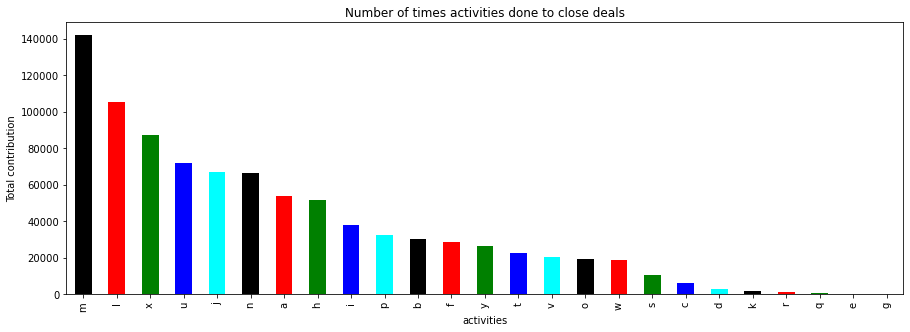

In [12]:
plt.figure(figsize=(15,5))
activities_group = activity_contribution_result.groupby('activity_type').sum()
distinct_activity_count['activity_count'].plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('activities')
plt.ylabel('Total contribution')
plt.title('Number of times activities done to close deals')

# show the plot
plt.show()

From the graph we can see that "m" is the activity that is mostly done to close deals with customers and it was done almost about 140k times. 2nd is the "l" and 3rd is "x"

<Figure size 1080x360 with 0 Axes>

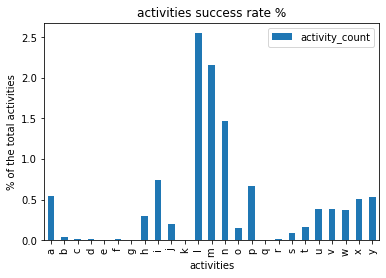

In [13]:
plt.figure(figsize=(15,5))
activities_group = activity_contribution_result.groupby('activity_type').sum()
percent_contribution = activities_group/distinct_activity_count['activity_count'].sum()*100
percent_contribution.plot(kind='bar')
plt.xlabel('activities')
plt.ylabel('% of the total activities')
plt.title('activities success rate %')


# show the plot
plt.show()

"l" activity has the highest success rate to close deals with customers which is almost 2.5%

**Send  Data to csv file**

In [14]:
result_all = pd.merge(activity,target,on='customer',how='left',indicator=True)
result_all

,date_x,customer,activity_type,activity_count,date_y,_merge
0,2021-01-20,0032j000002jRYxAAM,a,1,NaN,left_only
1,2021-05-11,0032j00000FZcIvAAL,a,1,NaN,left_only
2,2020-12-09,0032j000002gKM8AAM,a,1,NaN,left_only
3,2021-03-30,0032j000001UX7cAAG,a,1,NaN,left_only
4,2020-10-19,0032j000004etUWAAY,a,1,2021-04-07,both
...,...,...,...,...,...,...
904767,2020-10-16,0032j00000BHEpXAAX,f,1,NaN,left_only
904768,2020-10-16,0032j00000BHEqDAAX,f,1,NaN,left_only
904769,2020-10-16,0032j00000BHEo8AAH,f,1,NaN,left_only
904770,2020-10-16,0032j00000BHDuCAAX,f,1,NaN,left_only


In [15]:
result_all['contribution'] = np.where(result_all['_merge']=="left_only",0,1)
result_all

,date_x,customer,activity_type,activity_count,date_y,_merge,contribution
0,2021-01-20,0032j000002jRYxAAM,a,1,NaN,left_only,0
1,2021-05-11,0032j00000FZcIvAAL,a,1,NaN,left_only,0
2,2020-12-09,0032j000002gKM8AAM,a,1,NaN,left_only,0
3,2021-03-30,0032j000001UX7cAAG,a,1,NaN,left_only,0
4,2020-10-19,0032j000004etUWAAY,a,1,2021-04-07,both,1
...,...,...,...,...,...,...,...
904767,2020-10-16,0032j00000BHEpXAAX,f,1,NaN,left_only,0
904768,2020-10-16,0032j00000BHEqDAAX,f,1,NaN,left_only,0
904769,2020-10-16,0032j00000BHEo8AAH,f,1,NaN,left_only,0
904770,2020-10-16,0032j00000BHDuCAAX,f,1,NaN,left_only,0


In [16]:
result_all = result_all.loc[:,['activity_type','contribution']]
result_all.to_csv('result.csv',index=False)